In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/dimitris/PhD/PhD/nuscenes')
from devkit_dataloader.nuscenes import NuScenes
from devkit_dataloader.nuscenes import NuScenesExplorer
nusc = NuScenes(version='v1.0-mini', dataroot='/home/dimitris/PhD/PhD/nuscenes/data/sets/nuscenes/v1.0-mini', verbose=True)
nusc2 = NuScenesExplorer(nusc)
from devkit_dataloader.Dataloader import *

nuscenes run
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.643 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.575 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


lidar pc nuscenes: [[-3.1243734e+00 -3.2906363e+00 -3.4704101e+00 ... -1.4129141e+01
  -1.4120683e+01 -1.4113669e+01]
 [-4.3415368e-01 -4.3220678e-01 -4.3068862e-01 ...  4.9357712e-03
   9.8654358e-03  1.4782516e-02]
 [-1.8671920e+00 -1.8631892e+00 -1.8595628e+00 ...  1.9857219e+00
   2.3199446e+00  2.6591547e+00]
 [ 4.0000000e+00  1.0000000e+00  2.0000000e+00 ...  8.0000000e+01
   7.5000000e+01  4.0000000e+01]]
original image size (nuscenes.py): (1600, 900)
lidar frame pc: [[-3.1243734e+00 -3.2906363e+00 -3.4704101e+00 ... -1.4129141e+01
  -1.4120683e+01 -1.4113669e+01]
 [-4.3415368e-01 -4.3220678e-01 -4.3068862e-01 ...  4.9357712e-03
   9.8654358e-03  1.4782516e-02]
 [-1.8671920e+00 -1.8631892e+00 -1.8595628e+00 ...  1.9857219e+00
   2.3199446e+00  2.6591547e+00]
 [ 4.0000000e+00  1.0000000e+00  2.0000000e+00 ...  8.0000000e+01
   7.5000000e+01  4.0000000e+01]]
Max values in each row: [ 96.852745  98.59201   19.028015 255.      ]
ego vehicle pc: [[4.5807117e-01 4.5977646e-01 4.610165

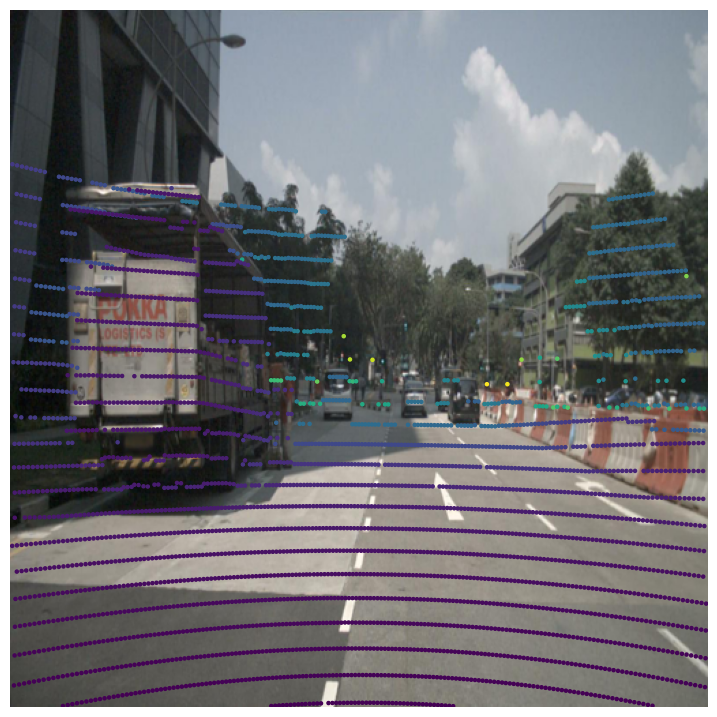

<Figure size 640x480 with 0 Axes>

In [2]:
# nusc_dataset = NuscenesDataset(nusc)
# input_image, path = nusc_dataset.__getitem__(0)
# points, lidar_points, original_points_leading_to_points = nusc_dataset.get_points(0)

my_scene = nusc.scene[0]
sample_token = my_scene['first_sample_token']
nusc2.render_pointcloud_in_image(sample_token)

# my_sample = nusc.sample[0]
# nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')


In [1]:
import sys
from PIL import Image
import pickle
sys.path.append('/home/dimitris/PhD/PhD/visualDet3D')
sys.path.append('/home/dimitris/PhD/PhD/nuscenes')
import importlib
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, models, transforms
import torchvision
from visualDet3D.data.kitti.utils import write_result_to_file
from visualDet3D.utils.utils import LossLogger, cfg_from_file
from visualDet3D.networks.utils.registry import DETECTOR_DICT, DATASET_DICT, PIPELINE_DICT
from visualDet3D.networks.heads.anchors import Anchors
from visualDet3D.networks.lib.fast_utils.hill_climbing import post_opt
from visualDet3D.networks.utils import BBox3dProjector, BackProjection
from visualDet3D.utils.utils import convertAlpha2Rot, convertRot2Alpha, draw_3D_box, compound_annotation
from utils.geometry_utils import view_points

import visualDet3D.data.kitti.dataset
from visualDet3D.utils.timer import Timer
from numba import jit
from tqdm import tqdm
print('CUDA available: {}'.format(torch.cuda.is_available()))

# cfg = cfg_from_file('D:/Python_Projects/PhD_project/visualDet3D/config/config.py')
cfg = cfg_from_file('/home/dimitris/PhD/PhD/visualDet3D/config/config.py')
is_test_train = True

cfg.batch_size=1
split_to_test='validation'

is_test_train = split_to_test == 'training'
if split_to_test == 'training':
    dataset_name = cfg.data.train_dataset
elif split_to_test == 'test':
    dataset_name = cfg.data.test_dataset
else:
    dataset_name = cfg.data.val_dataset

dataset = DATASET_DICT[dataset_name](
        cfg, split_to_test
        )
# print(dataset)
if split_to_test=='training':
    dataset_val = DATASET_DICT[cfg.data.val_dataset](
            cfg, 'validation'
            )
    dataset.transform = dataset_val.transform
    dataset.collate_fn = dataset_val.collate_fn

data = dataset[0]
points, lidar_points, masked_pc = nusc_dataset.get_points(0)
# print(masked_pc)

nbr_points = masked_pc.shape[1]
# Do operation in homogenous coordinates.
masked_pc = np.concatenate((masked_pc, np.ones((1, nbr_points))))
proj_p = np.dot(data['calib'], masked_pc)
proj_p = proj_p / proj_p[2:3, :].repeat(3, 0).reshape(3, nbr_points)
# print(proj_p)
print(f"data calib {data['calib']}")
print(f"proj_p {proj_p.max()}")

CUDA available: True


NameError: name 'nusc_dataset' is not defined

PICKLE LIDAR POINTS FOR 3D VISUALIZATION IN MENPO

In [5]:
nusc_dataset = NuscenesDataset(nusc)
points, lidar1, lidar2, lidar3, lidar4, lidar5 = nusc_dataset.get_points(52)
lidar_points1_reshaped = lidar1.T.reshape(-1, lidar1.shape[0])
lidar_points2_reshaped = lidar2.T.reshape(-1, lidar2.shape[0])
lidar_points3_reshaped = lidar3.T.reshape(-1, lidar3.shape[0])
lidar_points4_reshaped = lidar4.T.reshape(-1, lidar4.shape[0])
lidar_points5_reshaped = lidar5.T.reshape(-1, lidar5.shape[0])
print(lidar_points1_reshaped)
print(lidar_points2_reshaped)
print(lidar_points3_reshaped)
print(lidar_points4_reshaped)
print(lidar_points5_reshaped)
# print(lidar_points_reshaped)
# print(lidar_points_reshaped.shape)

[[ -3.1821182   -0.2338379   -1.9026124 ]
 [ -3.3457704   -0.23198432  -1.8952832 ]
 [ -3.5650697   -0.23042248  -1.9110241 ]
 ...
 [-13.732923     0.04550035   1.9300506 ]
 [-13.745653     0.05043644   2.258342  ]
 [-13.751976     0.05282405   2.5910192 ]]
[[ 0.6659756   3.187859   -0.04017222]
 [ 0.66825485  3.3514879  -0.0324533 ]
 [ 0.6692064   3.5708325  -0.04760182]
 ...
 [ 1.1279241  13.7271      3.8066194 ]
 [ 1.1480385  13.7388525   4.134368  ]
 [ 1.1658065  13.7441845   4.466596  ]]
[[ 6.4472595e+02  1.6181683e+03 -2.4861706e-02]
 [ 6.4483252e+02  1.6182925e+03 -1.5918123e-02]
 [ 6.4497351e+02  1.6184607e+03 -2.9392788e-02]
 ...
 [ 6.5184747e+02  1.6259142e+03  3.8960462e+00]
 [ 6.5187231e+02  1.6259055e+03  4.2235665e+00]
 [ 6.5189130e+02  1.6258933e+03  4.5555491e+00]]
[[ 0.8354687   3.1853952  -0.03736185]
 [ 0.83781964  3.3490515  -0.0296258 ]
 [ 0.8387466   3.5684278  -0.04475341]
 ...
 [ 1.2982457  13.724235    3.8105562 ]
 [ 1.3183069  13.735953    4.1383095 ]
 [ 1.336

In [6]:
import pickle

# Save 'a' to a pickle file
with open('array1.pkl', 'wb') as f:
    pickle.dump(lidar_points1_reshaped, f)
    # Save 'a' to a pickle file
with open('array2.pkl', 'wb') as f:
    pickle.dump(lidar_points2_reshaped, f)
    # Save 'a' to a pickle file
with open('array3.pkl', 'wb') as f:
    pickle.dump(lidar_points3_reshaped, f)
    # Save 'a' to a pickle file
with open('array4.pkl', 'wb') as f:
    pickle.dump(lidar_points4_reshaped, f)
    # Save 'a' to a pickle file
with open('array5.pkl', 'wb') as f:
    pickle.dump(lidar_points5_reshaped, f)



In [5]:
nusc_dataset = NuscenesDataset(nusc)
points, lidar_points, original_points_leading_to_points = nusc_dataset.get_points(0)
lidar_points_reshaped = lidar_points.T
print(lidar_points_reshaped)
print(lidar_points_reshaped.shape)
# [[ -3.206061     1.5842099   -0.84402037]
#  [ -3.3718703    1.5786911   -0.8401345 ]
#  [ -3.596776     1.5985287   -0.83736193]
#  ...
#  [-13.720347    -2.1470501   -0.42926744]
#  [-13.73397     -2.4733827   -0.40672225]
#  [-13.7414055   -2.8041933   -0.38630027]]
# (34688, 3)

points = np.array(points)
points = points[0]
points_reshaped = points.T.reshape(-1, points.shape[0])
print(points_reshaped)
print(points_reshaped.shape)

original_points_leading_to_points_reshaped = original_points_leading_to_points.T

im size: (1600, 900)
ego frame: [[7.85792470e-01 7.87490427e-01 7.88762510e-01 ... 1.29883683e+00
  1.31215727e+00 1.32565260e+00]
 [3.13138270e+00 3.29761124e+00 3.47738147e+00 ... 1.41138992e+01
  1.41034451e+01 1.40943985e+01]
 [5.63153392e-03 1.05857793e-02 1.52571239e-02 ... 3.91250420e+00
  4.24643850e+00 4.58536768e+00]
 [4.00000000e+00 1.00000000e+00 2.00000000e+00 ... 8.00000000e+01
  7.50000000e+01 4.00000000e+01]]
[[7.85792470e-01 3.13138270e+00 5.63153392e-03]
 [7.87490427e-01 3.29761124e+00 1.05857793e-02]
 [7.88762510e-01 3.47738147e+00 1.52571239e-02]
 ...
 [1.29883683e+00 1.41138992e+01 3.91250420e+00]
 [1.31215727e+00 1.41034451e+01 4.24643850e+00]
 [1.32565260e+00 1.40943985e+01 4.58536768e+00]]
(34688, 3)
[[442.18752513 278.77138814   1.        ]
 [442.18752513 278.77138814   1.        ]
 [442.27460972 278.76484743   1.        ]
 ...
 [487.08441719 506.52355618   1.        ]
 [492.12883548 507.61883364   1.        ]
 [494.73152915 510.65104951   1.        ]]
(4964, 3

In [6]:
import pickle

# Save 'a' to a pickle file
with open('array_ego_frame.pkl', 'wb') as f:
    pickle.dump(lidar_points_reshaped, f)

# # Save 'a' to a pickle file
# with open('2d_array.pkl', 'wb') as f:
#     pickle.dump(points_reshaped, f)

# # Save 'a' to a pickle file
# with open('original_points_leading_to_points.pkl', 'wb') as f:
#     pickle.dump(original_points_leading_to_points_reshaped, f)
